In [11]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_train = pd.read_csv("data/smoker_train.csv")
df_train = df_train.drop_duplicates()

# Grundlegende Visualiserung mit Matplotlib

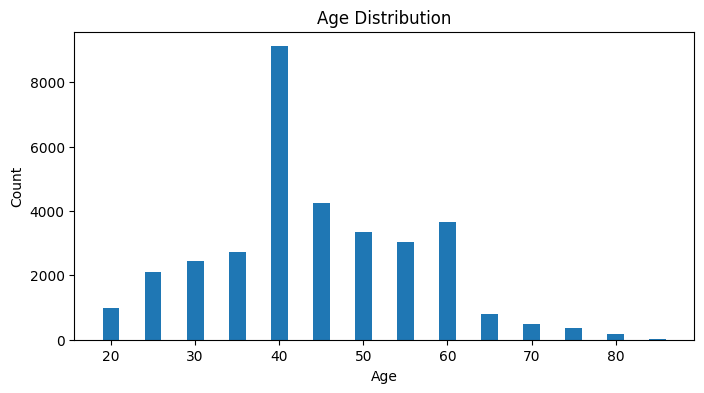

In [28]:
# Histogram of age distribution
plt.figure(figsize=(8, 4))
age_count = df_train['age'].value_counts().sort_index()
plt.bar(age_count.index, age_count.values, width=2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

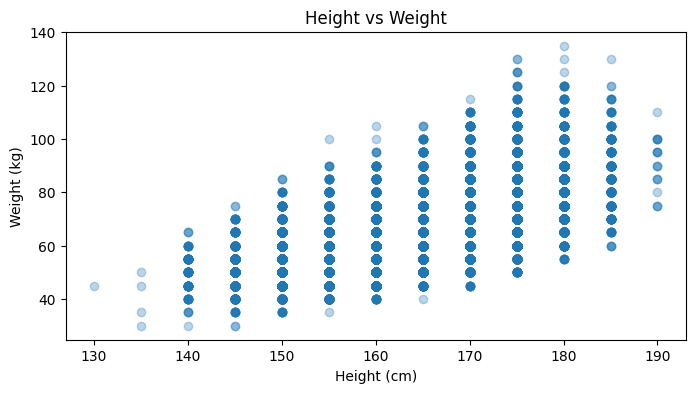

In [14]:

# Scatter plot: height vs weight
plt.figure(figsize=(8, 4))
plt.scatter(df_train['height(cm)'], df_train['weight(kg)'], alpha=0.3)
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# 

## Complex Visualization

<Figure size 800x400 with 0 Axes>

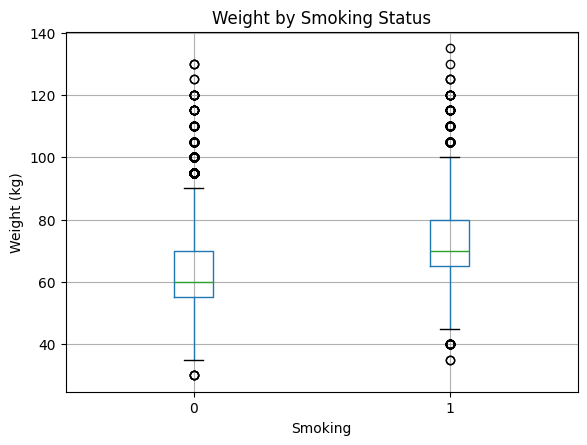

In [15]:
# Boxplot of weight by smoking status
plt.figure(figsize=(8, 4))
df_train.boxplot(column='weight(kg)', by='smoking')
plt.title('Weight by Smoking Status')
plt.suptitle('')
plt.xlabel('Smoking')
plt.ylabel('Weight (kg)')
plt.show()

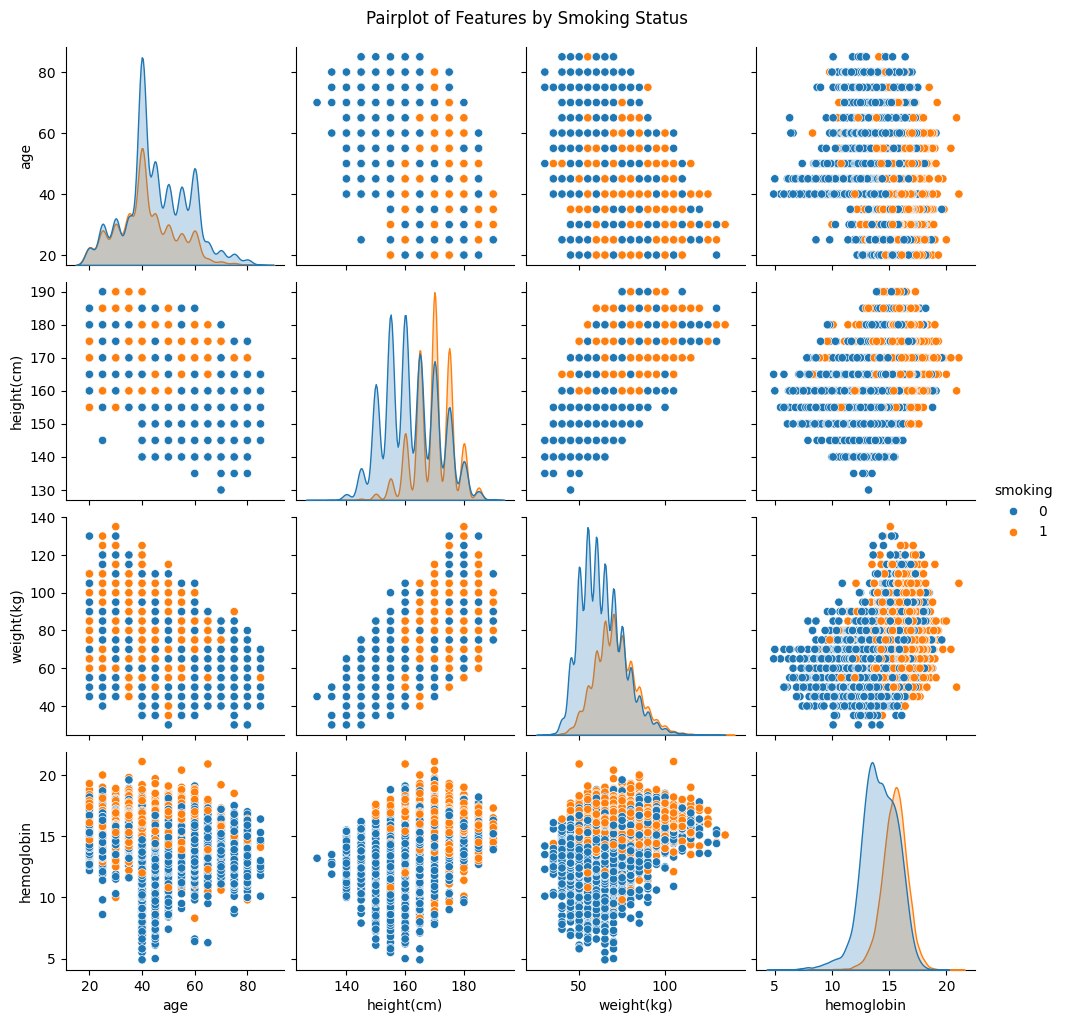

In [33]:
# Do a pairplot to visualize relationships
sns.pairplot(df_train, hue='smoking', vars=['age', 'height(cm)', 'weight(kg)', 'hemoglobin'])
plt.suptitle('Pairplot of Features by Smoking Status', y=1.02)
plt.show()

## Benfords Law

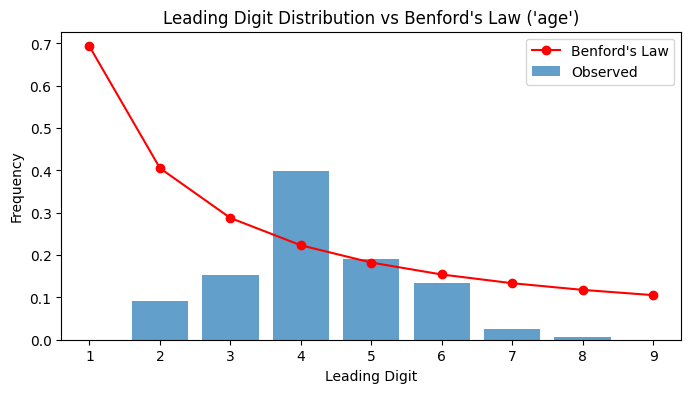

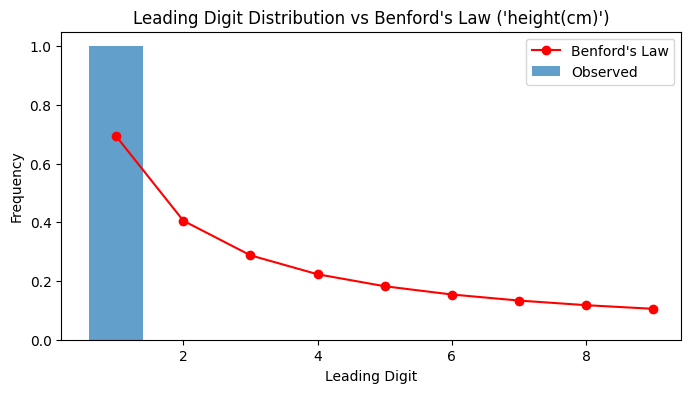

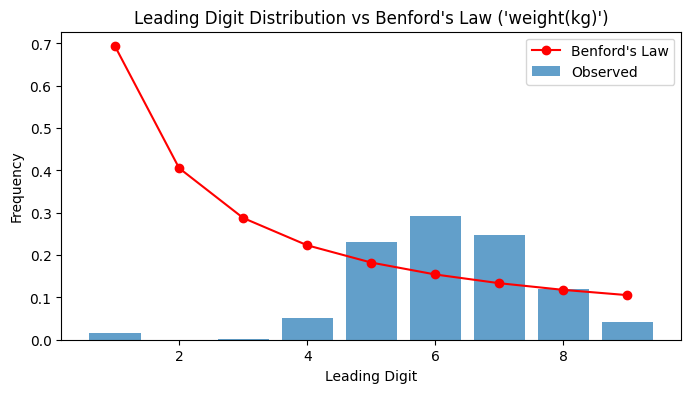

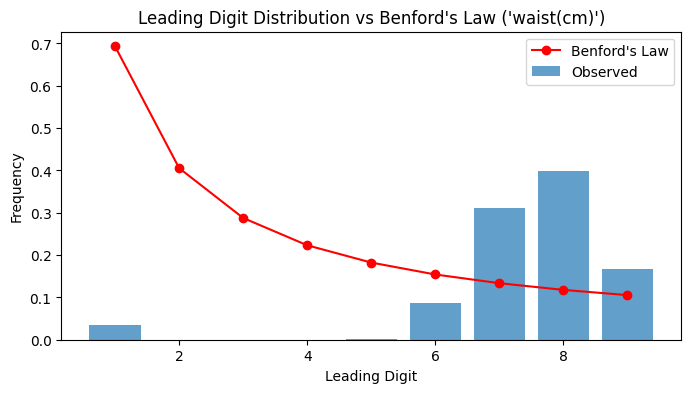

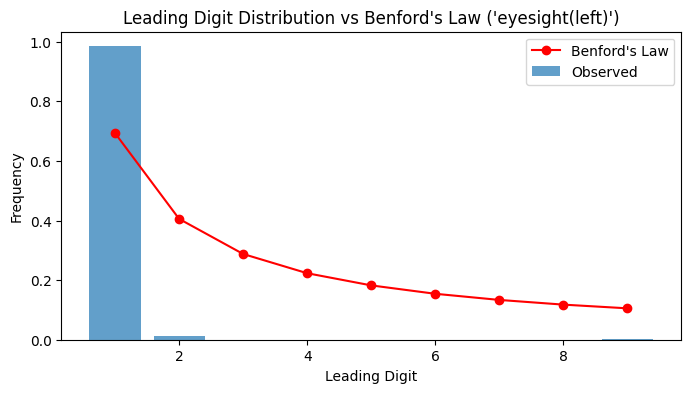

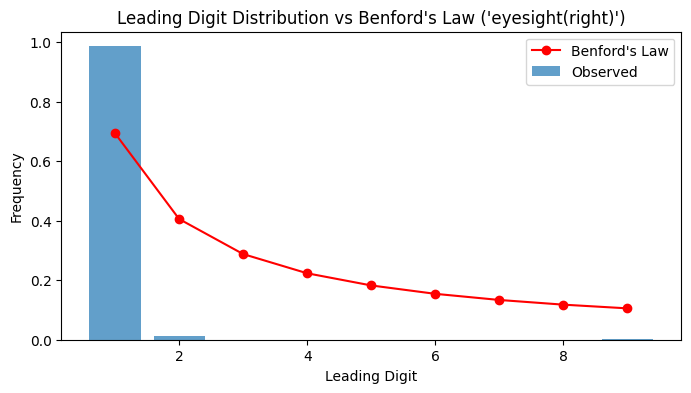

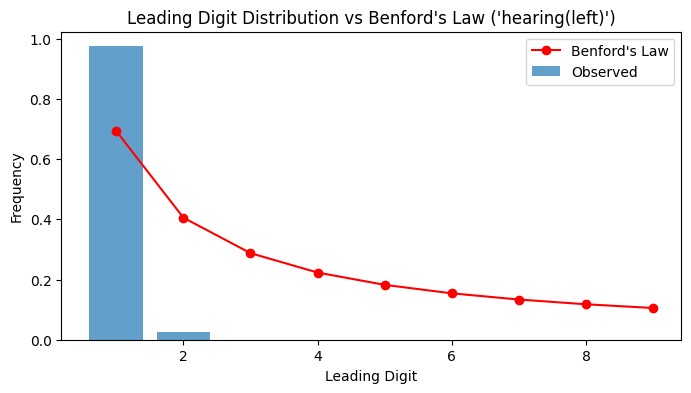

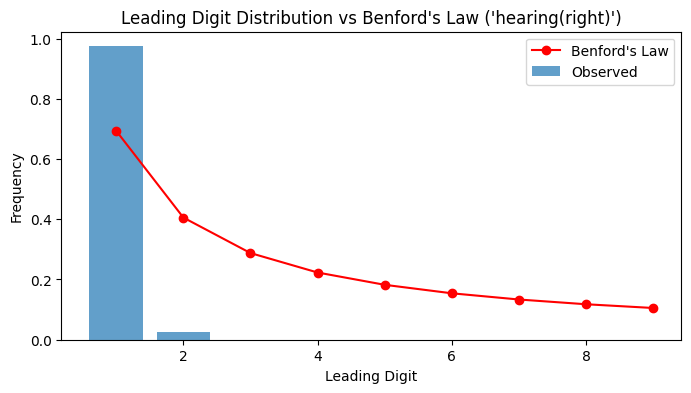

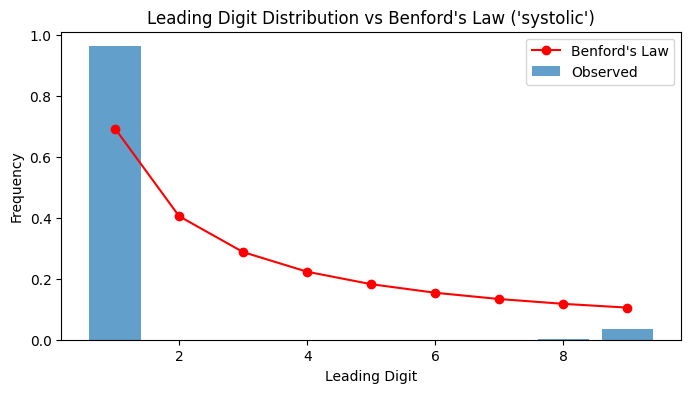

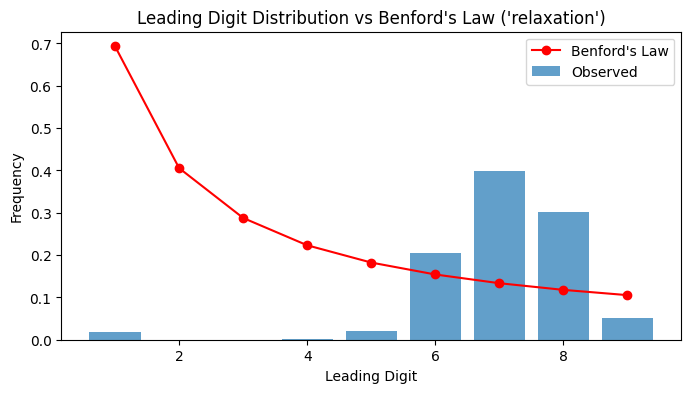

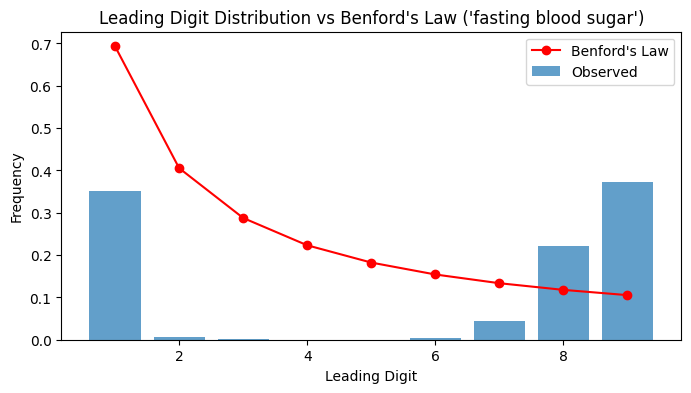

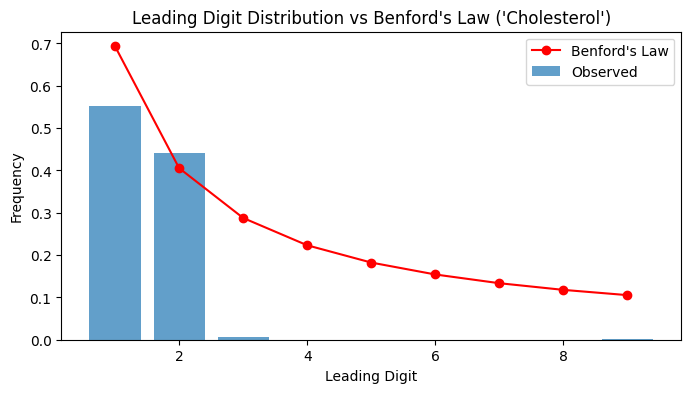

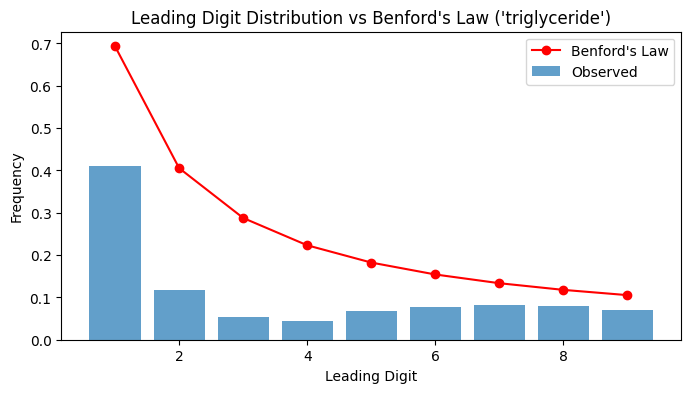

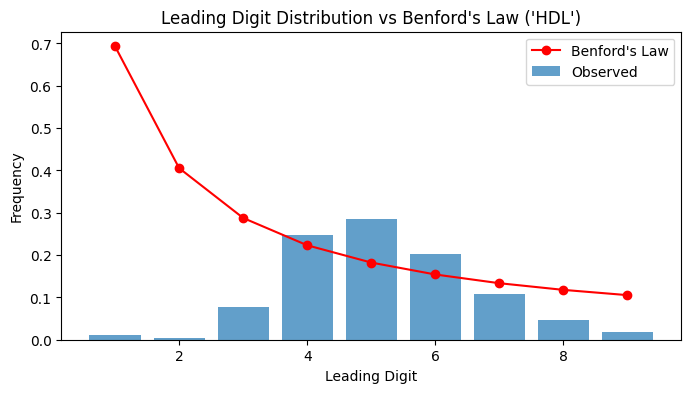

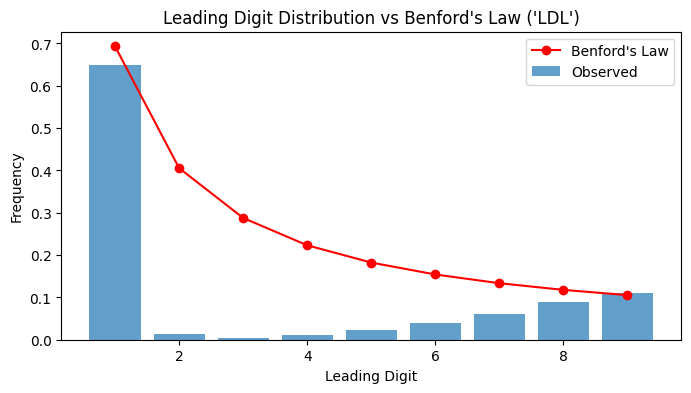

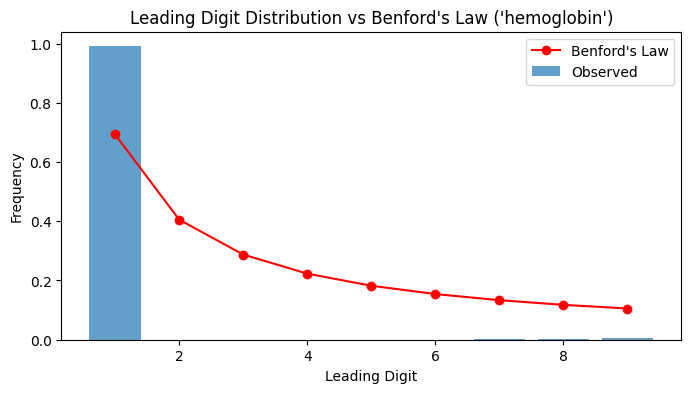

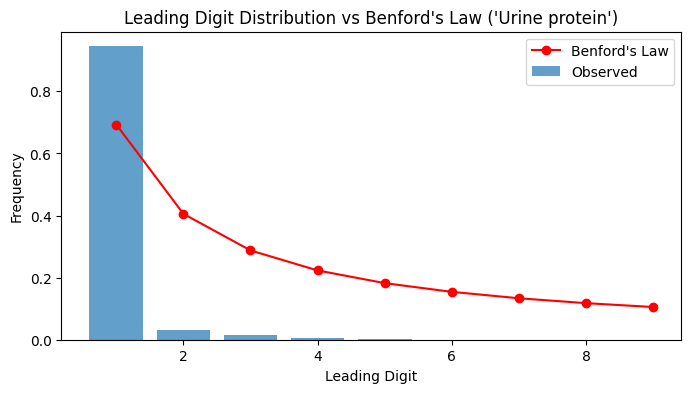

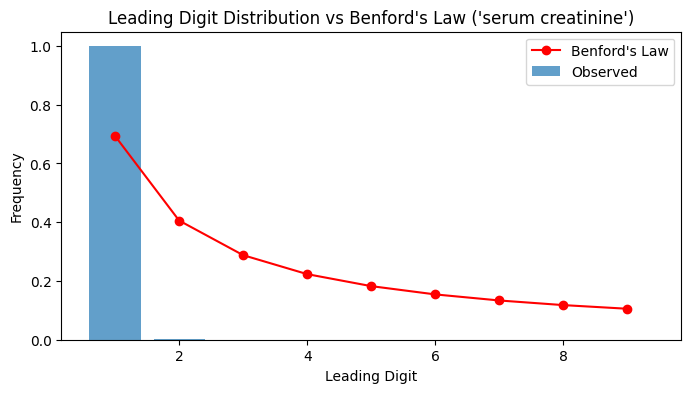

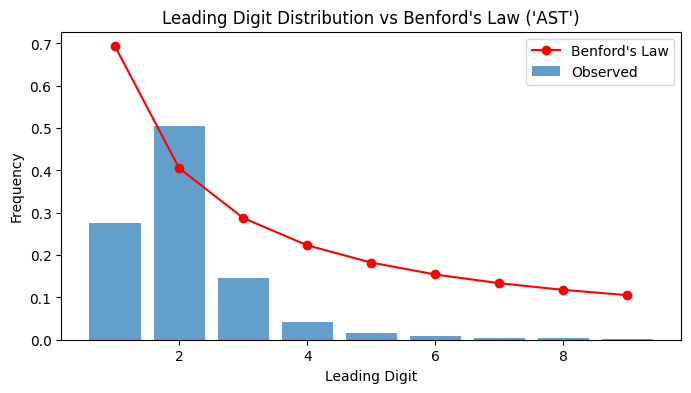

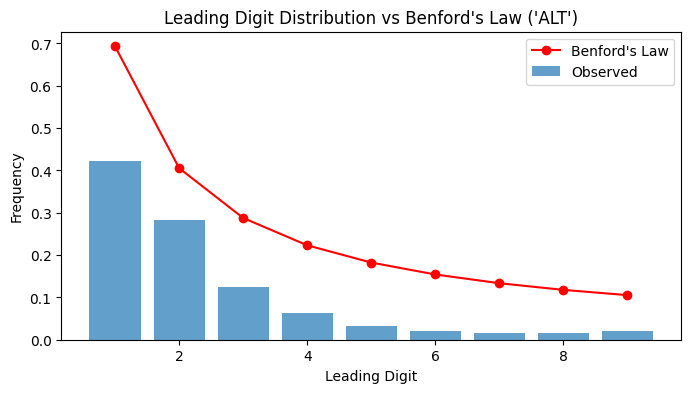

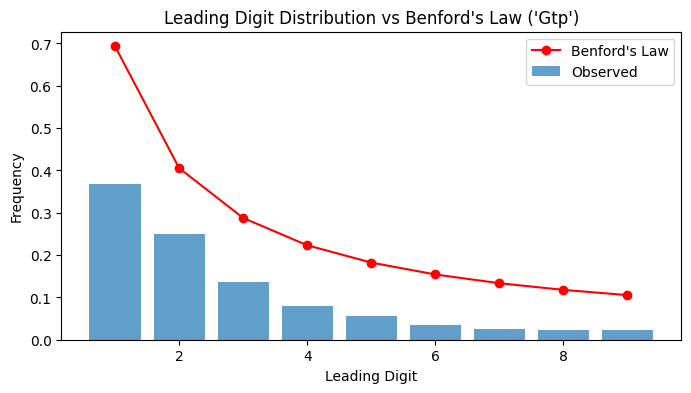

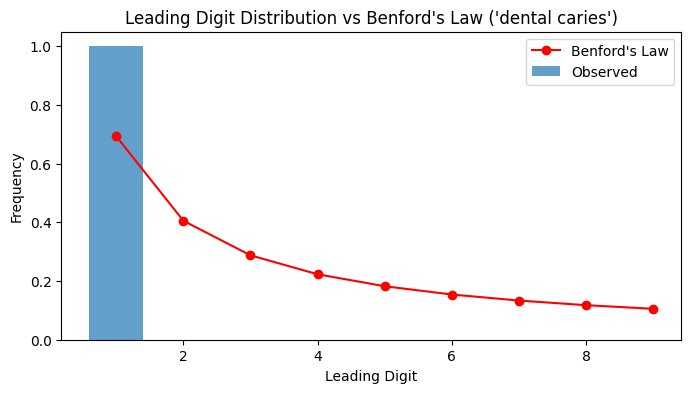

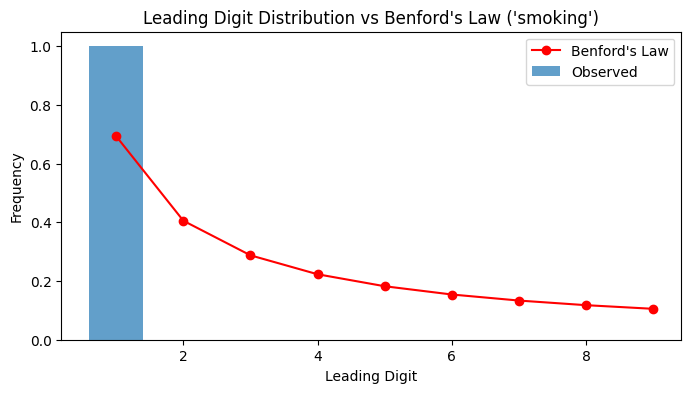

In [ ]:
benford_freq = np.log10(1 + 1 / np.arange(1, 10))

for col in df_train.columns:
    if df_train[col].dtype.kind in 'biufc':  # numeric columns only
        values = df_train[col].dropna().astype(str)
        leading_digits = values.str.lstrip('0').str.extract(r'^(\d)').dropna()[0].astype(int)
        observed_counts = leading_digits.value_counts().sort_index()
        observed_freq = observed_counts / observed_counts.sum()

        plt.figure(figsize=(8, 4))
        plt.bar(observed_freq.index, observed_freq.values, alpha=0.7, label='Observed')
        plt.plot(np.arange(1, 10), benford_freq, 'ro-', label="Benford's Law")
        plt.xlabel('Leading Digit')
        plt.ylabel('Frequency')
        plt.title(f"Leading Digit Distribution vs Benford's Law ('{col}')")
        plt.legend()
        plt.show()
